In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import scipy.optimize
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.optimize import curve_fit
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics


In [ ]:
# df2 = pd.read_csv('test_HP.csv')
# df2.shape

In [2]:
df = pd.read_csv('train_HP.csv', delimiter = ',')
df.shape

(2000, 21)

In [3]:
df =df[(df.sc_w > 0)] #lebar tidak mungkin 0
df =df[(df.px_height > 0)] #pixel tinggi tidak mungkin 0

In [4]:
df.shape

(1819, 21)

In [11]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
df=df[df['sc_w'] > 0]

In [17]:
df.shape

(1820, 21)

In [53]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,...,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,...,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143,0.760989,0.507692,0.513187,1.509341
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,...,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951,0.426597,0.500078,0.499963,1.119285
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,...,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,...,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


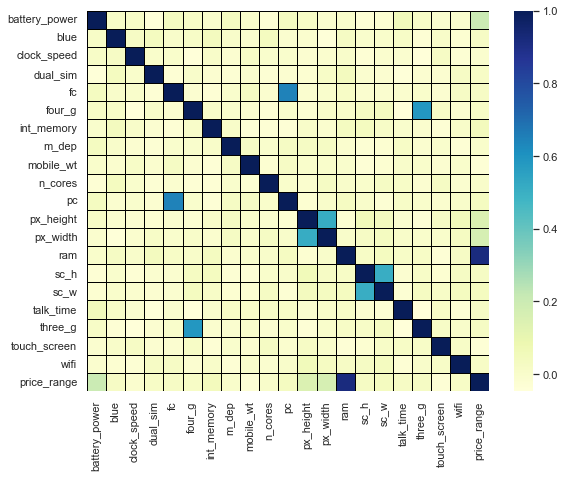

In [35]:
korelasi = df.corr()
sns.heatmap(data=korelasi, cmap="YlGnBu", linecolor="black", linewidths=0.5)
sns.set(rc={'figure.figsize':(9, 7)})

In [38]:
df.corr()['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

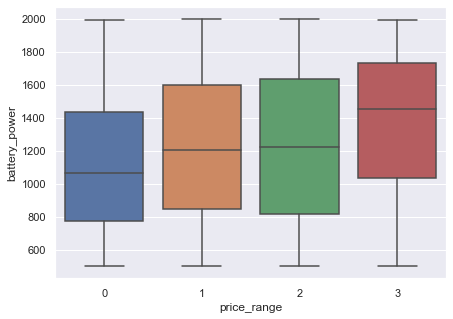

In [48]:
sns.boxplot(x="price_range", y="battery_power", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

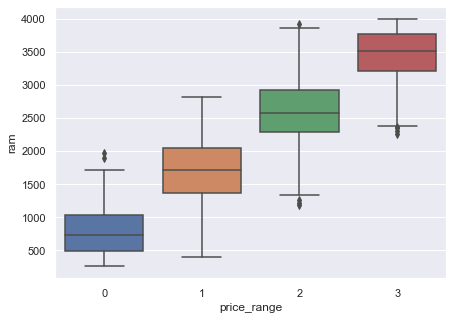

In [21]:
sns.boxplot(x="price_range", y="ram", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

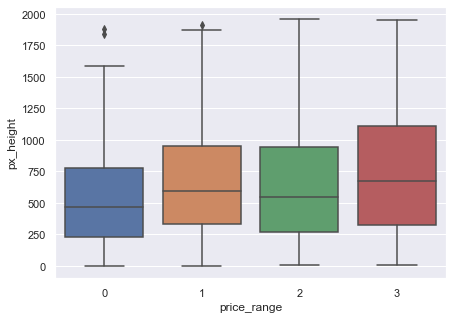

In [19]:
sns.boxplot(x="price_range", y="px_height", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

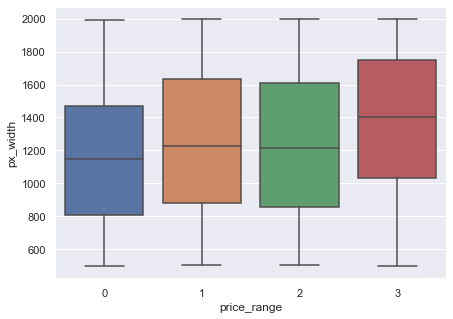

In [20]:
sns.boxplot(x="price_range", y="px_width", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

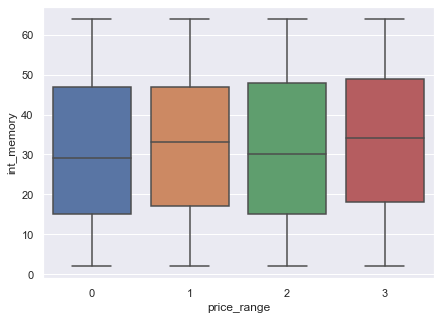

In [22]:
sns.boxplot(x="price_range", y="int_memory", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

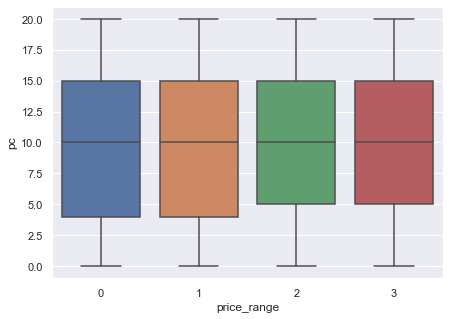

In [42]:
sns.boxplot(x="price_range", y="pc", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

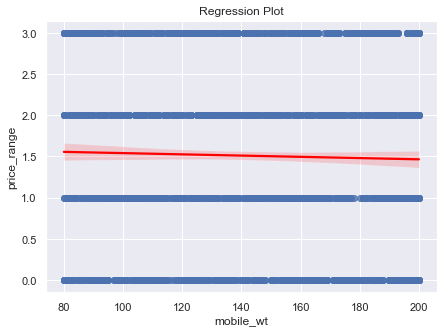

In [40]:
sns.regplot(df['mobile_wt'], df['price_range'], line_kws={"color": "red"})
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

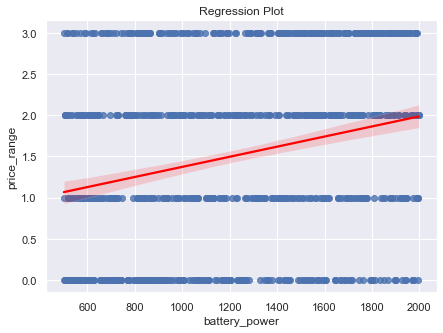

In [156]:
sns.regplot(df['battery_power'], df['price_range'], line_kws={"color": "red"})
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

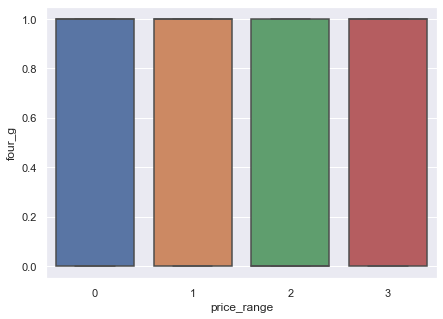

In [49]:
sns.boxplot(x="price_range", y="four_g", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

In [ ]:
sns.boxplot(x="price_range", y="ram", data=df)
sns.set(rc={'figure.figsize':(7, 5)})

In [5]:
dt_20kol = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',	
'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]

In [6]:
array_20kol = np.array(dt_20kol.values)

In [7]:
phone_labels = df[['price_range']]

In [8]:
label_np = np.array(phone_labels.values)

In [9]:
label_np = label_np.ravel()

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
iris_labels_en = le.fit_transform(label_np)

In [12]:
X = array_20kol
Y = iris_labels_en


In [13]:
selector  = SelectKBest(score_func=chi2, k=7)
selector.fit(X, Y)

SelectKBest(k=7, score_func=<function chi2 at 0x0000020759384790>)

In [14]:
cols = selector.get_support(indices=True)

df_features = dt_20kol.iloc[:,cols]

df_features.head()

,battery_power,int_memory,mobile_wt,px_height,px_width,ram,sc_w
0,842,7,188,20,756,2549,7
1,1021,53,136,905,1988,2631,3
2,563,41,145,1263,1716,2603,2
3,615,10,131,1216,1786,2769,8
4,1821,44,141,1208,1212,1411,2


-----

In [15]:
array_fitur = np.array(df_features.values)

X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, iris_labels_en) 

kNN_model_iris = KNeighborsClassifier(n_neighbors=4)

kNN_model_iris.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
Y_pred = kNN_model_iris.predict(X_test)

iris_classes = phone_labels.price_range.unique()
print(iris_classes)



[1 2 3 0]


In [17]:
print(classification_report(Y_test, Y_pred, target_names = iris_classes))


TypeError: object of type 'numpy.int64' has no len()

----

## Histrogram

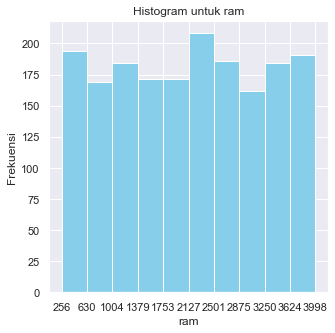

In [54]:
count, bin_edges = np.histogram(df['ram'])
df['ram'].plot(kind = 'hist', xticks = bin_edges, color = "skyblue")
plt.title('Histogram untuk ram')
plt.ylabel('Frekuensi')
plt.xlabel('ram')
plt.show()

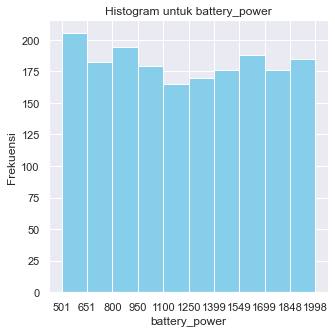

In [55]:
count, bin_edges = np.histogram(df['battery_power'])
df['battery_power'].plot(kind = 'hist', xticks = bin_edges, color = "skyblue")
plt.title('Histogram untuk battery_power')
plt.ylabel('Frekuensi')
plt.xlabel('battery_power')
plt.show()

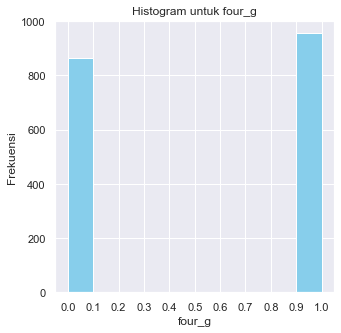

In [56]:
count, bin_edges = np.histogram(df['four_g'])
df['four_g'].plot(kind = 'hist', xticks = bin_edges, color = "skyblue")
plt.title('Histogram untuk four_g')
plt.ylabel('Frekuensi')
plt.xlabel('four_g')
plt.show()

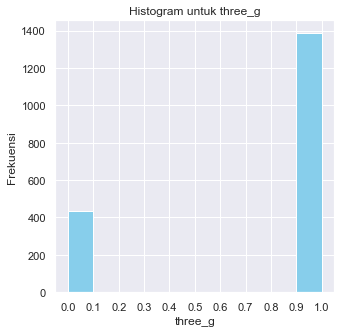

In [57]:
count, bin_edges = np.histogram(df['three_g'])
df['three_g'].plot(kind = 'hist', xticks = bin_edges, color = "skyblue")
plt.title('Histogram untuk three_g')
plt.ylabel('Frekuensi')
plt.xlabel('three_g')
plt.show()

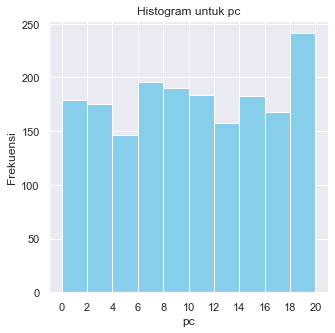

In [58]:
count, bin_edges = np.histogram(df['pc'])
df['pc'].plot(kind = 'hist', xticks = bin_edges, color = "skyblue")
plt.title('Histogram untuk pc')
plt.ylabel('Frekuensi')
plt.xlabel('pc')
plt.show()

----

In [43]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 101, stratify = Y)

In [45]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred_knn = model_knn.predict(x_valid) 

In [47]:
print(metrics.confusion_matrix(y_valid, y_pred_knn)) 

[[87  3  0  0]
 [ 5 84  2  0]
 [ 0  9 75  7]
 [ 0  0  5 87]]


In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 9}

In [49]:
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
y_pred_knn = model_knn.predict(x_valid) 

In [53]:
acc_knn = accuracy_score(y_valid, y_pred_knn)
acc_knn

0.9230769230769231

----

----

----

In [4]:
df = pd.read_csv('train_HP.csv')



In [5]:
df=df[df['sc_w'] > 0]

In [19]:
#Buat features dari 4 kolom pertama
dt_20kol = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',	
'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]
#Buat array Numpy utk features
array_20kol = np.array(dt_20kol.values)

In [21]:
#Buat label kelas dari kolom ke 5
labels = df[['price_range']]  # hasil: 1 kolom 
#Buat array Numpy utk kelas/label
label_np = np.array(labels.values) # numpy array 

#Ubah matriks 1 kolom ke 1 baris (spy dpt jadi parameter le.fit_transform(.))
label_np= label_np.ravel()

#creating labelEncoder
le = preprocessing.LabelEncoder()


#Ubah label string ke numerik
labels_en = le.fit_transform(label_np)
print(labels_en)

[1 2 2 ... 3 0 3]


In [22]:
X = array_20kol
Y = labels_en

In [23]:
selector  = SelectKBest(score_func=chi2, k=7)
selector.fit(X, Y)

# Ambil kolom yg terpilih (dg koefisien chi-square terbaik)
cols = selector.get_support(indices=True)
# Buat fitur dataframe dgn k kolom paling signifikan
df_features = dt_20kol.iloc[:,cols]

df_features.head

<bound method NDFrame.head of       battery_power  int_memory  mobile_wt  px_height  px_width   ram  sc_w
0               842           7        188         20       756  2549     7
1              1021          53        136        905      1988  2631     3
2               563          41        145       1263      1716  2603     2
3               615          10        131       1216      1786  2769     8
4              1821          44        141       1208      1212  1411     2
...             ...         ...        ...        ...       ...   ...   ...
1995            794           2        106       1222      1890   668     4
1996           1965          39        187        915      1965  2032    10
1997           1911          36        108        868      1632  3057     1
1998           1512          46        145        336       670   869    10
1999            510          45        168        483       754  3919     4

[1819 rows x 7 columns]>

In [24]:
array_fitur = np.array(df_features.values)

# Split dataset into training set and test set: 70% training and 30% test

X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, labels_en, test_size=0.3) 

#Klasifikasi setdata bunga Iris dgn algoritma kNN
#Buat model dgn jumlah neighbor (k) mulai dari 3 (lakukan eksperimen dengan nilai K yang bervariasi)
#Cari nilai k terbaik dgn memilih nilai akurasi tertinggi
#Simpan model dgn k terbaik
kNN_model = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
kNN_model.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = kNN_model.predict(X_test)

In [25]:
classes = ['0', '1', '2', '3']

In [150]:
# selector  = SelectKBest(score_func=chi2, k=5)
# selector.fit(X, Y)

# cols = selector.get_support(indices=True)
# df_features = dt_20kol.iloc[:,cols]
# array_fitur = np.array(df_features.values)
# X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, labels_en, test_size=0.3) 
# kNN_model = KNeighborsClassifier(n_neighbors=4)
# kNN_model.fit(X_train, Y_train)
# Y_pred = kNN_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.93      0.90      0.92       126
           2       0.91      0.95      0.93       145
           3       0.97      0.92      0.94       129

    accuracy                           0.94       546
   macro avg       0.94      0.94      0.94       546
weighted avg       0.94      0.94      0.94       546



----


In [109]:
df = pd.read_csv('train_HP.csv')
df=df[df['sc_w'] > 0]

dt_20kol = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',	
'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]

array_20kol = np.array(dt_20kol.values)
labels = df[['price_range']]  

label_np = np.array(labels.values)

label_np= label_np.ravel()

le = preprocessing.LabelEncoder()

labels_en = le.fit_transform(label_np)

In [6]:
X = array_20kol
Y = labels_en

In [7]:
classes = ['0', '1', '2', '3']

In [123]:
arrAkurasiNB = []
for x in range(2, 21):
    selector  = SelectKBest(score_func=chi2, k=x)
    selector.fit(X, Y)

    cols = selector.get_support(indices=True)

    df_features = dt_20kol.iloc[:,cols]

    array_fitur = np.array(df_features.values)

    X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, labels_en, test_size=0.3) 

    from sklearn.naive_bayes import GaussianNB

    NBC_model = GaussianNB()

    NBC_model.fit(X_train, Y_train)

    Y_pred = NBC_model.predict(X_test)

    from sklearn.metrics import classification_report
    print('k =', x)
    print(classification_report(Y_test, Y_pred, target_names = classes))

    akurasi = classification_report(Y_test, Y_pred,target_names = classes, output_dict=True)
    dtAkurasi = akurasi['accuracy']
    arrAkurasiNB.append(dtAkurasi)
    x+=1

k = 2
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       139
           1       0.72      0.65      0.69       147
           2       0.61      0.69      0.65       121
           3       0.85      0.84      0.85       139

    accuracy                           0.76       546
   macro avg       0.76      0.76      0.76       546
weighted avg       0.76      0.76      0.76       546

k = 3
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       143
           1       0.70      0.75      0.73       143
           2       0.73      0.64      0.68       149
           3       0.79      0.86      0.82       111

    accuracy                           0.78       546
   macro avg       0.78      0.78      0.78       546
weighted avg       0.78      0.78      0.78       546

k = 4
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       149
   

In [124]:
index = range(2, 21)
dfAkurasi = pd.DataFrame(list(zip(arrAkurasiNB)), columns=['accuracy'], index=index)

(0.0, 20.9)

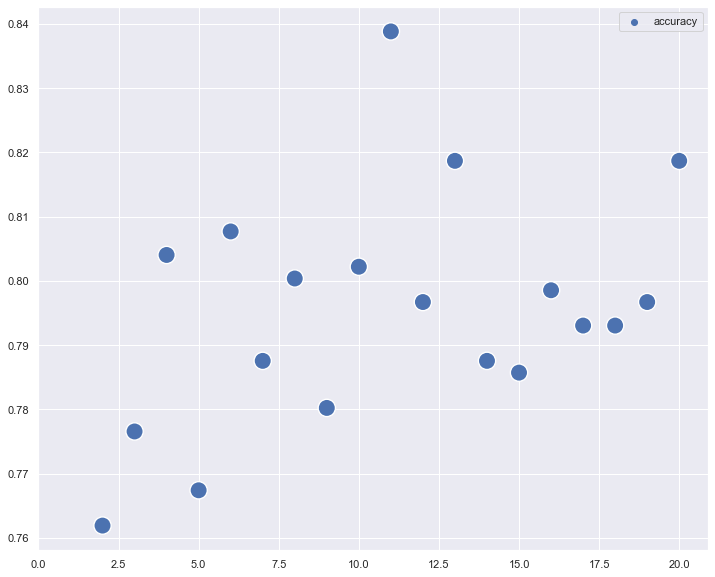

In [125]:
sns.scatterplot(data = dfAkurasi, s = 300)
sns.set(rc={'figure.figsize':(12, 10)})
plt.xlim(0, None)

In [2]:
df = pd.read_csv('train_HP.csv')
df=df[df['sc_w'] > 0]

dt_20kol = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',	
'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]

array_20kol = np.array(dt_20kol.values)
labels = df[['price_range']]  

label_np = np.array(labels.values)

label_np= label_np.ravel()

le = preprocessing.LabelEncoder()

labels_en = le.fit_transform(label_np)

In [3]:
X = array_20kol
Y = labels_en

In [4]:
selector  = SelectKBest(score_func=chi2, k=7)
selector.fit(X, Y)

cols = selector.get_support(indices=True)

df_features = dt_20kol.iloc[:,cols]

df_features.head

<bound method NDFrame.head of       battery_power  int_memory  mobile_wt  px_height  px_width   ram  sc_w
0               842           7        188         20       756  2549     7
1              1021          53        136        905      1988  2631     3
2               563          41        145       1263      1716  2603     2
3               615          10        131       1216      1786  2769     8
4              1821          44        141       1208      1212  1411     2
...             ...         ...        ...        ...       ...   ...   ...
1995            794           2        106       1222      1890   668     4
1996           1965          39        187        915      1965  2032    10
1997           1911          36        108        868      1632  3057     1
1998           1512          46        145        336       670   869    10
1999            510          45        168        483       754  3919     4

[1820 rows x 7 columns]>

In [ ]:
classes = ['0', '1', '2', '3']

In [27]:
array_fitur = np.array(df_features.values)
X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, labels_en, test_size=0.3) 
kNN_model = KNeighborsClassifier(n_neighbors=17)
kNN_model.fit(X_train, Y_train)
Y_pred = kNN_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       123
           1       0.99      0.89      0.94       149
           2       0.88      0.92      0.89       130
           3       0.94      0.94      0.94       144

    accuracy                           0.93       546
   macro avg       0.93      0.94      0.93       546
weighted avg       0.94      0.93      0.93       546



In [38]:
arrAkurasiKNN = []
for x in range(3, 51):

    array_fitur = np.array(df_features.values)
    X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, labels_en, test_size=0.3) 
    kNN_model = KNeighborsClassifier(n_neighbors=x)
    kNN_model.fit(X_train, Y_train)
    Y_pred = kNN_model.predict(X_test)

    from sklearn.metrics import classification_report
    print('neighbour =', x)
    print(classification_report(Y_test, Y_pred, target_names = classes))

    akurasiKNN = classification_report(Y_test, Y_pred,target_names = classes, output_dict=True)
    dtAkurasiKNN = akurasiKNN['accuracy']
    arrAkurasiKNN.append(dtAkurasiKNN)
    x+=1

neighbour = 3
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       136
           1       0.88      0.88      0.88       144
           2       0.88      0.83      0.85       139
           3       0.91      0.95      0.93       127

    accuracy                           0.90       546
   macro avg       0.90      0.90      0.90       546
weighted avg       0.90      0.90      0.90       546

neighbour = 4
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       139
           1       0.90      0.91      0.91       137
           2       0.84      0.85      0.85       132
           3       0.94      0.86      0.90       138

    accuracy                           0.90       546
   macro avg       0.90      0.90      0.90       546
weighted avg       0.90      0.90      0.90       546

neighbour = 5
              precision    recall  f1-score   support

           0       0.95      0.97

In [139]:
index = range(3, 51)
dfAkurasiKNN = pd.DataFrame(list(zip(arrAkurasiKNN)), columns=['accuracy'], index=index)

(0.0, 52.35)

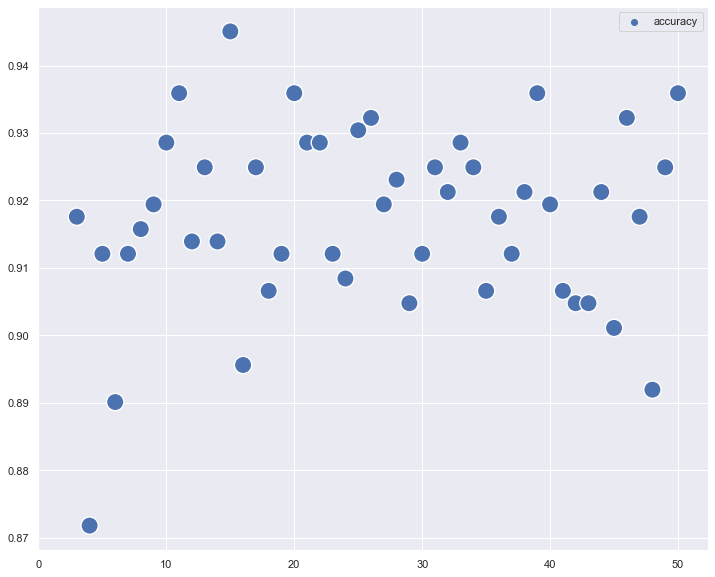

In [140]:
sns.scatterplot(data = dfAkurasiKNN, s = 300)
sns.set(rc={'figure.figsize':(12, 10)})
plt.xlim(0, None)

In [95]:
classes = ['0', '1', '2', '3']

In [102]:
# from sklearn.metrics import classification_report
# print(classification_report(Y_test, Y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.91      0.94      0.92       132
           2       0.92      0.85      0.89       144
           3       0.90      0.95      0.92       134

    accuracy                           0.92       546
   macro avg       0.92      0.92      0.92       546
weighted avg       0.92      0.92      0.92       546



----

In [6]:
dt_20kol = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',	
'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]

In [33]:
X = df[['battery_power','ram','px_height', 'px_width','int_memory','mobile_wt', 'sc_w']]

X.shape
y = df[['price_range']]
y.shape


(1819, 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


model_regres = LinearRegression()  
model_regres.fit(X_train, y_train)

print(model_regres.intercept_)
print(model_regres.coef_)

y_pred = model_regres.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import r2_score
r_2 = r2_score(y_test, y_pred)
print('R^2: ', r_2)


[-1.59912904]
[[ 0.0004997   0.00095247  0.00028537  0.0002745   0.00156721 -0.00086945
   0.00103702]]
Mean Absolute Error (MAE): 0.27747868423134076
Mean Squared Error (MSE): 0.1089011398725043
Root Mean Squared Error (RMSE): 0.3300017270750326
R^2:  0.909856275557529


----

### Prediksi

In [39]:
pkl_filename = "newTestHP.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(kNN_model, file)

In [40]:
import pickle 
pkl_filename = "newTestHP.pkl"  
with open(pkl_filename, 'rb') as file:  
    loaded_model = pickle.load(file)

In [41]:
df_new = pd.read_csv('new_test_HP.csv', delimiter = ',')

X_new = df_new[['battery_power','ram','px_height', 'px_width','int_memory','mobile_wt', 'sc_w']]

Y_pred_new = loaded_model.predict(X_new)
print(Y_pred_new)

[0 0 0 0 0 0 0 0 0 0 0]


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
